In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel
from keras.datasets import cifar10
import numpy as np

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
# Simplify for demonstration (use only 10 images for speed)
x_test = x_test[:10]
y_test = y_test[:10]

# Define candidate labels
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [3]:
# Prepare images and perform zero-shot classification
results = []
for image in x_test:
    # Prepare the image
    inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

    # Generate logits
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

    # Get the predicted label
    predicted_label = labels[torch.argmax(probs)]
    results.append(predicted_label)

In [4]:
# Compare predictions
print("Predictions:", results)
print("True labels:", [labels[y[0]] for y in y_test])

Predictions: ['ship', 'ship', 'ship', 'airplane', 'frog', 'dog', 'automobile', 'frog', 'cat', 'automobile']
True labels: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile']


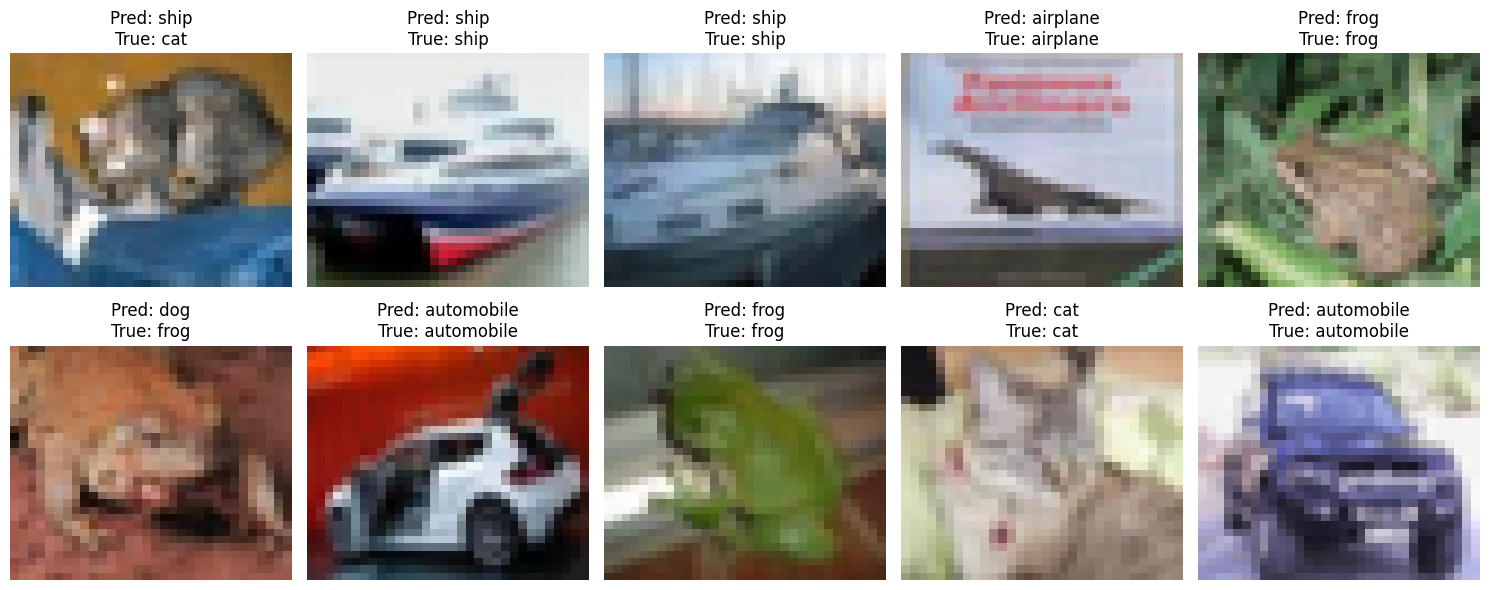

In [8]:
import matplotlib.pyplot as plt

# Adjusted function to plot images, predictions, and true labels
def plot_images(images, predictions, true_labels):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    axes = axes.flatten()

    for img, ax, pred, true_name in zip(images, axes, predictions, true_labels):
        ax.imshow(img, aspect='auto')
        ax.axis('off')
        ax.set_title(f"Pred: {pred}\nTrue: {true_name}")

    plt.tight_layout()
    plt.show()

# Use the function with correct parameters
plot_images(x_test, results, true_label_names)